### Sentiment Classification - polarity of the attribute review

- Organization of the file review-sentiment-classification.ipymb:

Code 1: Imports 

Code 2: Sentiment Analysis (using TextBlob and VADER) for both the raw and cleaned data 

The output CSV files are:

- For VADER analysis on the cleaned data: drugsComTrain_clean_vader.csv
- For VADER analysis on the raw data: drugsComTrain_raw_vader.csv
- For TextBlob analysis on the cleaned data: drugsComTrain_clean_Textblob.csv
- For TextBlob analysis on the raw data: drugsComTrain_raw_Textblob.csv


New Columns Added to Each Dataset:

As a result of the sentiment analysis process for both TextBlob and VADER, the following new columns are added to the datasets:

- textblob_score: The polarity score from TextBlob, ranging from -1 (most negative) to 1 (most positive).
- textblob_rescaled: The rescaled TextBlob score, using the rescale function to transform the score to a range of 0 to 10.
- textBlob_label: The sentiment label for TextBlob scores (Negative, Neutral, or Positive) based on the rescaled score.
- VADER_score: The compound score from VADER, also ranging from -1 (most negative) to 1 (most positive).
- VADER_rescaled: The rescaled VADER score, similarly transformed to a range of 0 to 10.
- VADER_label: The sentiment label for VADER scores (Negative, Neutral, or Positive) based on the rescaled score.


Code 3: Imports for Data Visualisation 

Code 4: Comparison of Sentiment Classifications

Code 5: Comparison of Sentiment Classifications and Ratings

Code 6: Comparison of Ratings Frequency and TextBlob Rescaled Scores

Code 7: Comparison of Ratings Frequency and VADER Rescaled Scores

Code 8: Comparative Analysis of the Top 10 Drugs: Average Ratings vs. VADER Sentiment Scores



In [2]:
# Code 1: Imports 

import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
# Code 2: Sentiment Analysis (using TextBlob and VADER) for both the raw and cleaned data 

# Function for rescaling scores
def rescale(score, old_min=-1, old_max=1, new_min=0, new_max=10):
    return ((score - old_min) * (new_max - new_min) / (old_max - old_min)) + new_min

#  Function to label sentiment
def label_sentiment(score):
    if score <= 4:  
        return 'Negative'
    elif score <= 6: 
        return 'Neutral'
    else:           
        return 'Positive'
    
# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to process a dataset and save TextBlob and VADER results
def process_and_save(ds, dataset_type):
    ds['review'] = ds['review'].astype(str)
    
    # Copy of the original ds to keep the VADER and TextBlob analysis separate
    ds_textblob = ds.copy()
    ds_vader = ds.copy()
    
    # TextBlob analysis
    ds_textblob['TextBlob_score'] = ds_textblob['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
    ds_textblob['TextBlob_rescaled'] = ds_textblob['TextBlob_score'].apply(rescale)
    ds_textblob['TextBlob_label'] = ds_textblob['TextBlob_rescaled'].apply(label_sentiment)
    
    # VADER analysis
    ds_vader['VADER_score'] = ds_vader['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
    ds_vader['VADER_rescaled'] = ds_vader['VADER_score'].apply(rescale)
    ds_vader['VADER_label'] = ds_vader['VADER_rescaled'].apply(label_sentiment)
    
    tb_output_path = f'C:\\Users\\Home\\Desktop\\TESE\\MEIC-TFM\\MEIC-TFM\\drugsComTrain_{dataset_type}_textblob.csv'
    vader_output_path = f'C:\\Users\\Home\\Desktop\\TESE\\MEIC-TFM\\MEIC-TFM\\drugsComTrain_{dataset_type}_vader.csv'
    
    ds_textblob.to_csv(tb_output_path, columns=['uniqueID', 'drugName', 'condition', 'review', 'date', 'usefulCount', 'TextBlob_score', 'TextBlob_rescaled', 'TextBlob_label'], index=False)
    ds_vader.to_csv(vader_output_path, columns=['uniqueID', 'drugName', 'condition', 'review', 'date', 'usefulCount', 'VADER_score', 'VADER_rescaled', 'VADER_label'], index=False)
    
    print(f"Processed {dataset_type} data.")
    print(f"TextBlob results saved to {tb_output_path}.")
    print(f"VADER results saved to {vader_output_path}.")

# Process cleaned data
cleaned_ds = pd.read_csv(r'C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_cleaned.csv')
process_and_save(cleaned_ds, 'clean')

# Process raw data
raw_ds = pd.read_csv(r'C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_raw.csv')
process_and_save(raw_ds, 'raw')



Processed clean data.
TextBlob results saved to C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_clean_textblob.csv.
VADER results saved to C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_clean_vader.csv.
Processed raw data.
TextBlob results saved to C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_raw_textblob.csv.
VADER results saved to C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_raw_vader.csv.


In [2]:
# Code 3: Imports for Data Visualisation 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

plt.style.use('ggplot')

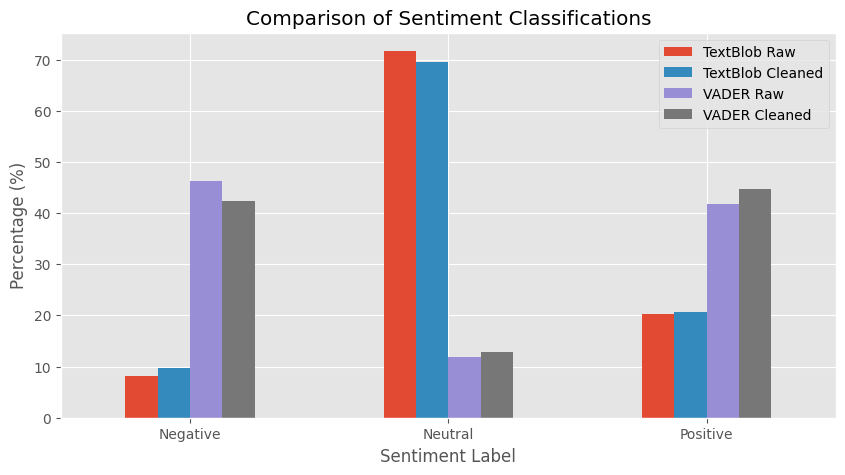

In [3]:
# Code 4: Comparison of Sentiment Classifications

def summarize_sentiments(df, sentiment_column):
    return df[sentiment_column].value_counts(normalize=True) * 100

textblob_label_column = 'TextBlob_label'
vader_label_column = 'VADER_label'

# Load datasets
raw_vader = pd.read_csv('drugsComTrain_raw_vader.csv')
clean_vader = pd.read_csv('drugsComTrain_clean_vader.csv')
raw_textblob = pd.read_csv('drugsComTrain_raw_textblob.csv')
clean_textblob = pd.read_csv('drugsComTrain_clean_textblob.csv')

# Summarize sentiments
summary = pd.DataFrame({
    'TextBlob Raw': summarize_sentiments(raw_textblob, textblob_label_column),
    'TextBlob Cleaned': summarize_sentiments(clean_textblob, textblob_label_column),
    'VADER Raw': summarize_sentiments(raw_vader, vader_label_column),
    'VADER Cleaned': summarize_sentiments(clean_vader, vader_label_column)
})

# Plot the data
summary.plot(kind='bar', figsize=(10, 5))
plt.title('Comparison of Sentiment Classifications')
plt.ylabel('Percentage (%)')
plt.xlabel('Sentiment Label')
plt.xticks(rotation=0)
plt.show()



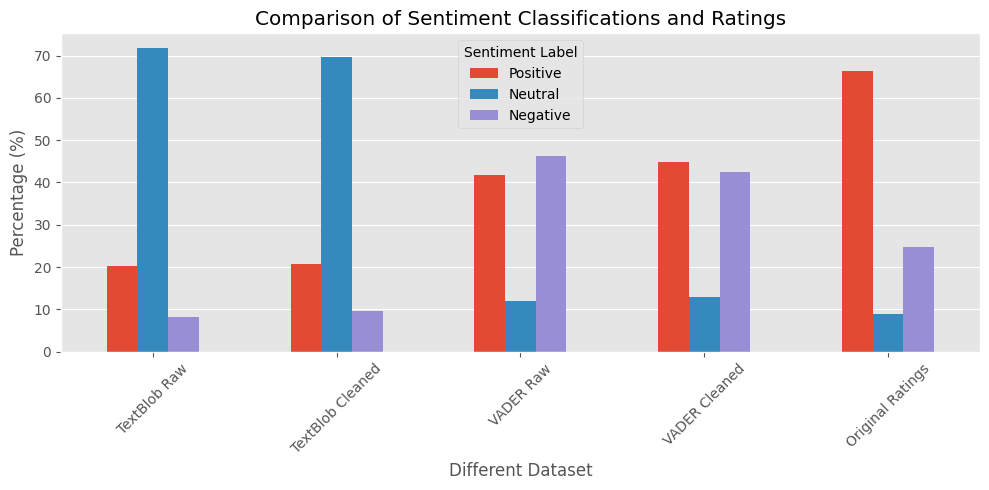

In [4]:
# Code 5: Comparison of Sentiment Classifications and Ratings

# Correct file path for the original dataset
original_data_path = 'drugsComTrain_raw_or.csv'

# Load original dataset
original_data = pd.read_csv(original_data_path)

# Categorize ratings
def categorize_rating(rating):
    if rating <= 4:    
        return 'Negative'
    elif rating <= 6:  
        return 'Neutral'
    else:              
        return 'Positive'

original_data['Rating_Label'] = original_data['rating'].apply(categorize_rating)

# Summarize the ratings
ratings_summary = original_data['Rating_Label'].value_counts(normalize=True) * 100

# Function to summarize sentiment classifications for a dataset
def summarize_sentiments(df, sentiment_column):
    return df[sentiment_column].value_counts(normalize=True) * 100

textblob_label_column = 'TextBlob_label'
vader_label_column = 'VADER_label'

# Load sentiment analysis results
raw_vader = pd.read_csv('drugsComTrain_raw_vader.csv')
clean_vader = pd.read_csv('drugsComTrain_clean_vader.csv')
raw_textblob = pd.read_csv('drugsComTrain_raw_textblob.csv')
clean_textblob = pd.read_csv('drugsComTrain_clean_textblob.csv')

# Summarize sentiments
summary = pd.DataFrame({
    'TextBlob Raw': summarize_sentiments(raw_textblob, textblob_label_column),
    'TextBlob Cleaned': summarize_sentiments(clean_textblob, textblob_label_column),
    'VADER Raw': summarize_sentiments(raw_vader, vader_label_column),
    'VADER Cleaned': summarize_sentiments(clean_vader, vader_label_column),
    'Original Ratings': ratings_summary
})

# Plot the data 
# Since we are adding the Original Ratings, we need to handle the different index base of the summary DataFrame

summary = summary.reindex(['Positive', 'Neutral', 'Negative']).fillna(0)  # Reindex to ensure alignment
summary.T.plot(kind='bar', figsize=(10, 5))  # Transpose for proper plotting
plt.title('Comparison of Sentiment Classifications and Ratings')
plt.ylabel('Percentage (%)')
plt.xlabel('Different Dataset')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.grid(axis='x')
plt.tight_layout()
plt.show()




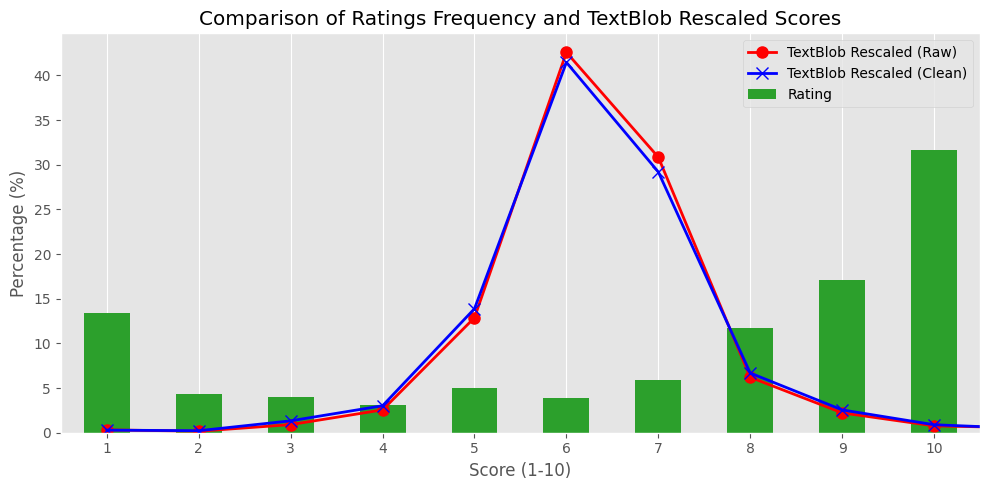

In [5]:
# Code 6: Comparison of Ratings Frequency and TextBlob Rescaled Scores

# Load datasets
original_data = pd.read_csv('drugsComTrain_raw_or.csv')
textblob_raw_data = pd.read_csv('drugsComTrain_raw_textblob.csv') 
textblob_clean_data = pd.read_csv('drugsComTrain_clean_textblob.csv')  

# Prepare rating frequency 
rating_freq = original_data['rating'].value_counts().sort_index()

# Prepare TextBlob Rescaled frequency data for both raw and cleaned, rounding the scores for grouping to be possible
textblob_raw_freq = textblob_raw_data['TextBlob_rescaled'].round().value_counts().sort_index()
textblob_clean_freq = textblob_clean_data['TextBlob_rescaled'].round().value_counts().sort_index()

# Normalize frequencies 
rating_freq_normalized = rating_freq / rating_freq.sum() * 100
textblob_raw_freq_normalized = textblob_raw_freq / textblob_raw_freq.sum() * 100
textblob_clean_freq_normalized = textblob_clean_freq / textblob_clean_freq.sum() * 100

# Plot the data 
plt.figure(figsize=(10, 5))

# Bar plot for Ratings
rating_freq_normalized.plot(kind='bar', color='tab:green', label='Rating')

# Line plot for TextBlob Rescaled Scores (Raw Data)
textblob_raw_freq_normalized.plot(kind='line', marker='o', linewidth=2, markersize=8, color='red', label='TextBlob Rescaled (Raw)')

# Line plot for TextBlob Rescaled Scores (Cleaned Data)
textblob_clean_freq_normalized.plot(kind='line', marker='x', linewidth=2, markersize=8, color='blue', label='TextBlob Rescaled (Clean)')

plt.title('Comparison of Ratings Frequency and TextBlob Rescaled Scores')
plt.xlabel('Score (1-10)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  
plt.legend()

plt.grid(axis='y')
plt.tight_layout()  
plt.show()


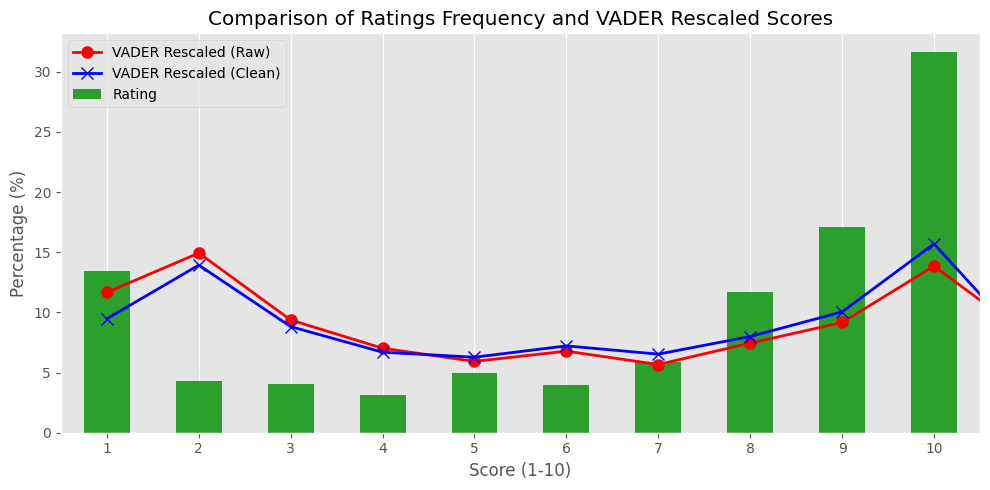

In [6]:
# Code 7: Comparison of Ratings Frequency and VADER Rescaled Scores

# Load datasets
original_data = pd.read_csv('drugsComTrain_raw_or.csv')
vader_raw_data = pd.read_csv('drugsComTrain_raw_vader.csv') 
vader_clean_data = pd.read_csv('drugsComTrain_clean_vader.csv') 

# Prepare rating frequency 
rating_freq = original_data['rating'].value_counts().sort_index()

# Prepare VADER Rescaled frequency data for both raw and cleaned, rounding the scores for grouping to be possible
vader_raw_freq = vader_raw_data['VADER_rescaled'].round().value_counts().sort_index()
vader_clean_freq = vader_clean_data['VADER_rescaled'].round().value_counts().sort_index()

# Normalize frequencies to compare
rating_freq_normalized = rating_freq / rating_freq.sum() * 100
vader_raw_freq_normalized = vader_raw_freq / vader_raw_freq.sum() * 100
vader_clean_freq_normalized = vader_clean_freq / vader_clean_freq.sum() * 100

# Plot the data
plt.figure(figsize=(10, 5))

# Bar plot for Ratings
rating_freq_normalized.plot(kind='bar', color='tab:green', label='Rating')

# Line plot for VADER Rescaled Scores (Raw Data)
vader_raw_freq_normalized.plot(kind='line', marker='o', linewidth=2, markersize=8, color='red', label='VADER Rescaled (Raw)')

# Line plot for VADER Rescaled Scores (Cleaned Data)
vader_clean_freq_normalized.plot(kind='line', marker='x', linewidth=2, markersize=8, color='blue', label='VADER Rescaled (Clean)')

plt.title('Comparison of Ratings Frequency and VADER Rescaled Scores')
plt.xlabel('Score (1-10)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  
plt.legend()

plt.grid(axis='y')
plt.tight_layout()  
plt.show()


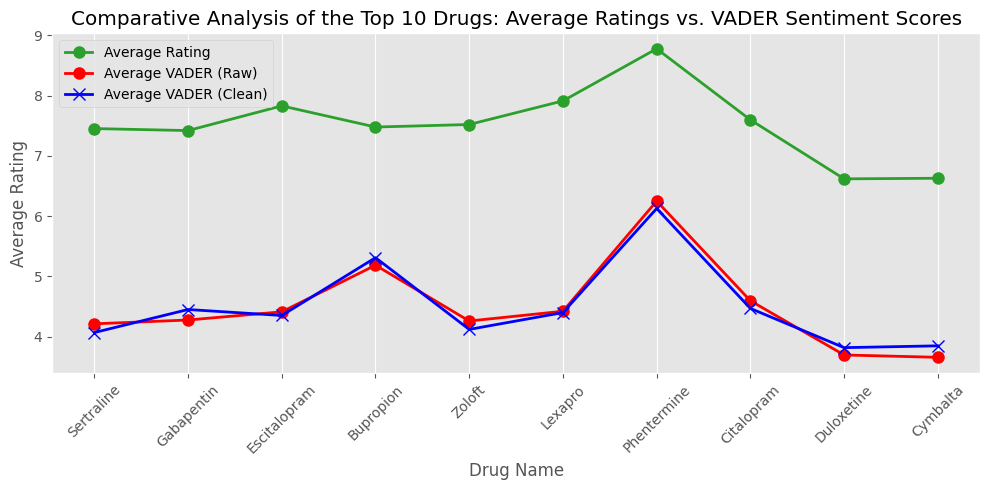

In [7]:
# Code 8: Comparative Analysis of the Top 10 Drugs: Average Ratings vs. VADER Sentiment Scores


# Load and combine training and testing datasets
alldata = [
    pd.read_csv(r'C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_raw_or.csv'),    
    pd.read_csv(r'C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTest_raw_or.csv')
]
ds = pd.concat(alldata, ignore_index=True)

# Load VADER analysis results
vader_raw_data = pd.read_csv('drugsComTrain_raw_vader.csv')
vader_clean_data = pd.read_csv('drugsComTrain_clean_vader.csv')

# Identifying the top 10 drugs by usefulCount from the combined dataset
total_usefulCount_by_drug = ds.groupby('drugName')['usefulCount'].sum()
top_10_drugs = total_usefulCount_by_drug.nlargest(10)

# Filter VADER data for the top 10 drugs
top_vader_raw_data = vader_raw_data[vader_raw_data['drugName'].isin(top_10_drugs.index)]
top_vader_clean_data = vader_clean_data[vader_clean_data['drugName'].isin(top_10_drugs.index)]

# Calculate the average ratings and VADER rescaled scores for the top 10 drugs
avg_ratings = ds[ds['drugName'].isin(top_10_drugs.index)].groupby('drugName')['rating'].mean().reindex(top_10_drugs.index)
avg_vader_raw = top_vader_raw_data.groupby('drugName')['VADER_rescaled'].mean().reindex(top_10_drugs.index)
avg_vader_clean = top_vader_clean_data.groupby('drugName')['VADER_rescaled'].mean().reindex(top_10_drugs.index)

# Plot the data 
plt.figure(figsize=(10, 5))


plt.xlabel('Drug Name')
plt.ylabel('Average Rating')
plt.tick_params(axis='y')
plt.plot(top_10_drugs.index, avg_ratings, color='tab:green', label='Average Rating', marker='o', linewidth=2, markersize=8)
plt.plot(top_10_drugs.index, avg_vader_raw, color='red', label='Average VADER (Raw)', marker='o', linewidth=2, markersize=8)
plt.plot(top_10_drugs.index, avg_vader_clean, color='blue', label='Average VADER (Clean)', marker='x', linewidth=2, markersize=8)
plt.xticks(np.arange(len(top_10_drugs.index)))
plt.xticks(rotation=45)

plt.legend(loc='upper left')
plt.grid(axis='y')
plt.title('Comparative Analysis of the Top 10 Drugs: Average Ratings vs. VADER Sentiment Scores')
plt.tight_layout()
plt.show()
